In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from eumap.misc import find_files, ttprint
from eumap.raster import read_rasters, save_rasters
from eumap.mapper import SpaceOverlay
import warnings
import matplotlib

folder = '/home/opengeohub/xuemeng/work_xuemeng/soc'


### depth

In [ ]:
df = pd.read_csv(f'{folder}/data/001.2_covar_overlayed.csv',low_memory=False)
# df = pd.read_csv(f'{folder}/data/002_data_whole.csv',low_memory=False)


In [2]:
dff = df
# add depth thickness
# hzn_dep = hzn_btm+(hzn_top-hzn_btm)/2
dff['hzn_dep'] = dff['hzn_top'] + (dff['hzn_btm']-dff['hzn_top'])/2

In [3]:
for i in dff.columns:
    if 'hzn' in i:
        print(i)

hzn_top
hzn_btm
hzn_dep


In [4]:
dff = dff.drop(columns=['hzn_top','hzn_btm'])

In [5]:
len(dff['nuts0'].unique())

37

### texture data preparation

In [6]:
# df = pd.read_csv(f'/home/opengeohub/xuemeng/work_xuemeng/soc/data/002.2_data_whole.csv',low_memory=False)
df = dff
# Round all numeric columns to 1 decimal place
columns_to_round = ['clay', 'silt', 'sand']
columns_round = [i+'_round' for i in columns_to_round]
df[columns_round] = df[columns_to_round].round(1)
df['clay_round'] = np.where(df['clay_round'] == 0, 0.1, df['clay_round'])

# Calculate the 2 components O1 and O2
df['texture1'] = df['sand_round'] / df['clay_round']
df['texture2'] = df['silt_round'] / df['clay_round']

df['texture1_qa'] = np.minimum(df['sand_qa'], df['clay_qa'])
df['texture2_qa'] = np.minimum(df['silt_qa'], df['clay_qa'])

df = df.drop(columns = ['clay_round', 'silt_round', 'sand_round'])

# df.to_csv(f'{folder}/data/002.2_data_whole.csv',index=False)

### socd data

In [7]:
df['ocd'] = df['bulk_density']*df['oc']
df['ocd_qa'] = np.minimum(df['bulk_density_qa'], df['oc_qa'])

In [8]:
df.to_csv(f'{folder}/data/002.2_data_whole.csv',index=False)

In [11]:
dff = df.loc[(df['ocd_qa']>5)&(df['ocd'].notna())]
dff

,id,lat,lon,time,ref,nuts0,oc,ph_h2o,ph_cacl2,bulk_density,...,accum.ndwi_glad.landsat.seasconv.m.yearly_p50_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20240513,accum.ndvi_glad.landsat.seasconv.m.yearly_p50_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20240513,tile_id,hzn_dep,texture1,texture2,texture1_qa,texture2_qa,ocd,ocd_qa
129706,FBVWJWQKSK,51.558282,0.416641,2007.0,ukceh,UK,40.328404,5.66,NaN,1.088364,...,1153.0,1685.0,855.0,7.5,NaN,NaN,2.0,2.0,43.891984,7.0
129707,FSYQRVOCEX,51.558311,0.411305,2007.0,ukceh,UK,27.191928,7.57,NaN,1.367034,...,1192.0,1583.0,855.0,7.5,NaN,NaN,2.0,2.0,37.172285,7.0
129708,HBXIZXUNBJ,51.561879,0.412706,2007.0,ukceh,UK,62.596050,7.01,NaN,0.890140,...,1216.0,1705.0,855.0,7.5,NaN,NaN,2.0,2.0,55.719263,7.0
129709,PAGUWNSGMX,51.560794,0.416919,2007.0,ukceh,UK,50.097685,6.39,NaN,0.969027,...,1254.0,1758.0,855.0,7.5,NaN,NaN,2.0,2.0,48.546027,7.0
129710,IURBDUKLQY,50.774939,-2.609121,2007.0,ukceh,UK,33.320903,6.57,NaN,1.003785,...,1196.0,1706.0,780.0,7.5,NaN,NaN,2.0,2.0,33.447034,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358862,32243654,54.803822,-7.243667,2018.0,LUCAS,UK,173.600000,5.07,4.8,0.291000,...,3053.0,4069.0,700.0,10.0,NaN,NaN,10.0,10.0,50.517600,10.0
358869,32463644,54.763212,-6.872958,2018.0,LUCAS,UK,36.500000,4.69,4.6,0.744000,...,3253.0,4295.0,738.0,10.0,NaN,NaN,10.0,10.0,27.156000,10.0
358870,32483682,55.097961,-6.983552,2018.0,LUCAS,UK,13.200000,6.32,5.7,1.382000,...,3078.0,4124.0,737.0,10.0,NaN,NaN,10.0,10.0,18.242400,10.0
358871,32543634,54.692770,-6.715202,2018.0,LUCAS,UK,47.900000,5.65,5.3,0.939000,...,3183.0,4298.0,738.0,10.0,NaN,NaN,10.0,10.0,44.978100,10.0


### Distribution and availbility

In [2]:
df = pd.read_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/data/002.2_data_whole.csv', low_memory=False)

dff = df.loc[df[f'ocd_qa']>5]
dff.loc[:,'ocd_log1p'] = np.log1p(dff[f'ocd'])
# dff = dff.dropna(subset=['ocd'],how='any')
dff = dff.dropna(subset=['ocd_log1p'],how='any')

# dfff = dff[['id', 'lat', 'lon', 'time', 'ref', 'nuts0', 'oc','oc_qa','bulk_density_qa','bulk_density','hzn_dep','ocd', 'ocd_qa']]
# dfff.to_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/result_paper/data_availibility_socd.csv',index=False)

/tmp/ipykernel_1192619/1276595628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.loc[:,'ocd_log1p'] = np.log1p(dff[f'ocd'])


ocd


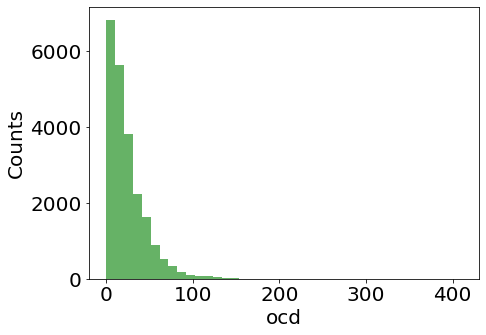

--------------
oc


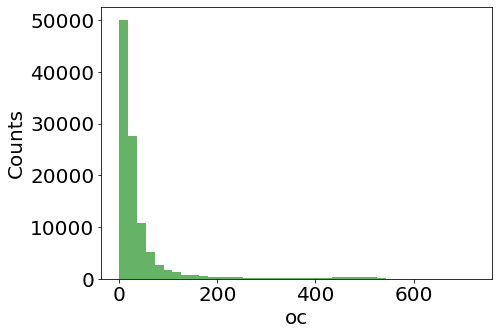

--------------
bulk_density


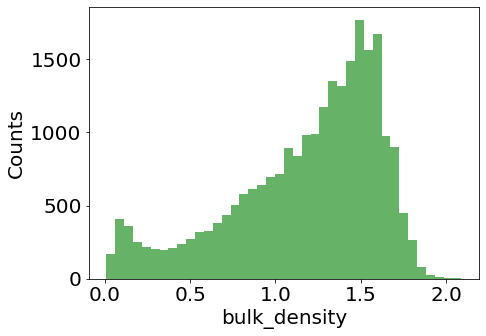

--------------
ph_cacl2


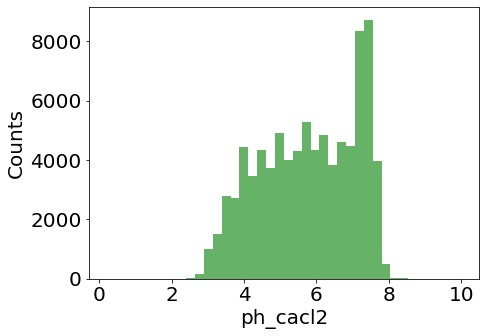

--------------
ph_h2o


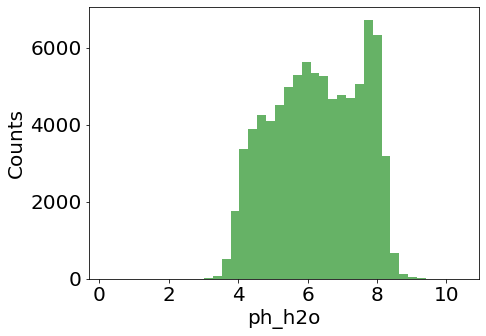

--------------
N


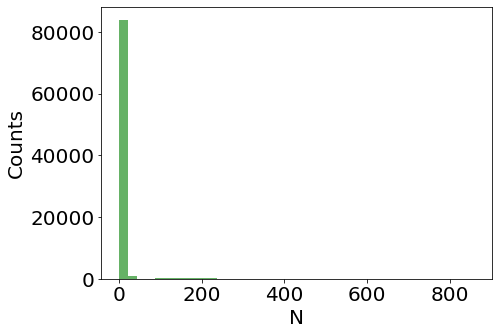

--------------
caco3


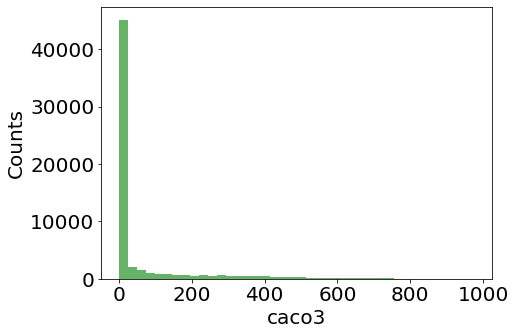

--------------
K


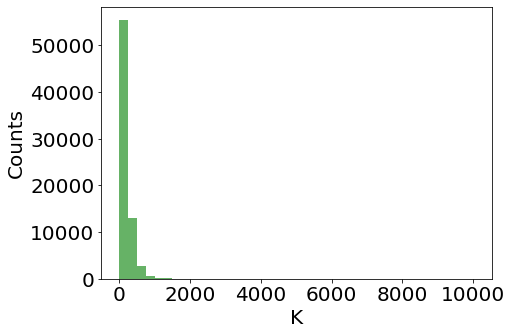

--------------
EC


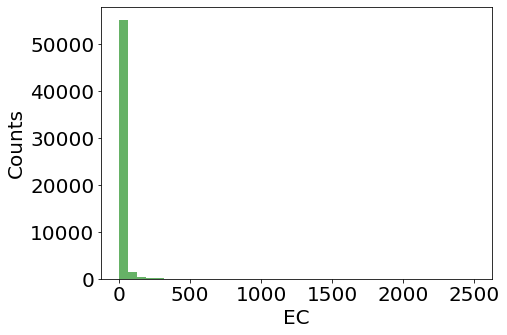

--------------
P


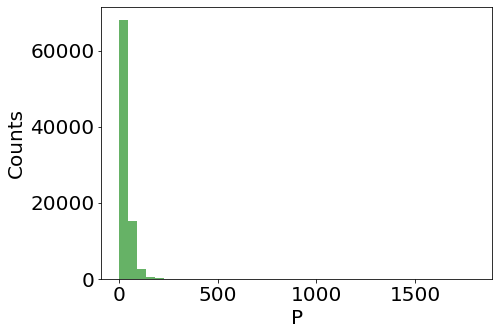

--------------
CEC


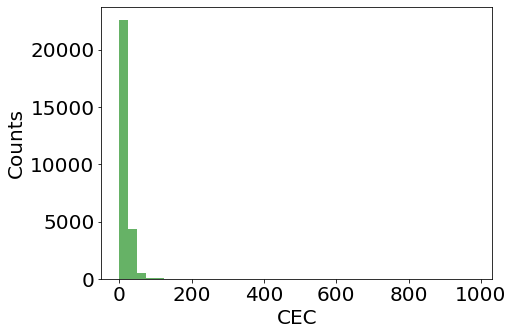

--------------
texture1


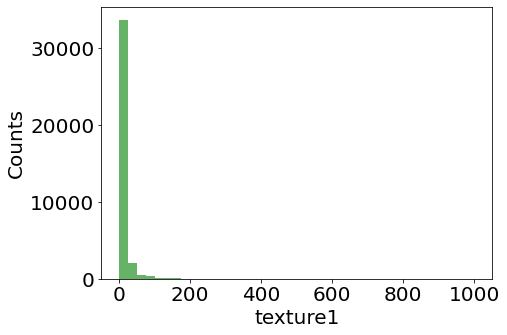

--------------
texture2


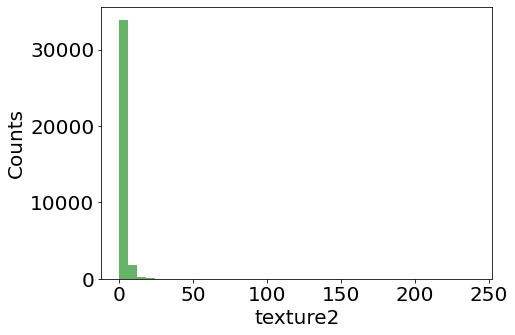

--------------


In [3]:
prop_list = ['ocd','oc','bulk_density', 'ph_cacl2','ph_h2o','N','caco3','K','EC','P','CEC','texture1','texture2'] # unitl N everything has lightGBM models
for pp in prop_list:
    temp = df.loc[df[pp].notna()]
    temp = temp.loc[temp[f'{pp}_qa']>5]
    
    print(pp)
    fig, axs = plt.subplots(figsize=(7, 5))

    axs.hist(temp[pp], bins=40, density=False, alpha=0.6, color='g')
    # axs.set_title('Log1p-scale', fontsize=16)
    axs.set_ylabel('Counts', fontsize=20)
    axs.set_xlabel(pp, fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    plt.show()
    print('--------------')

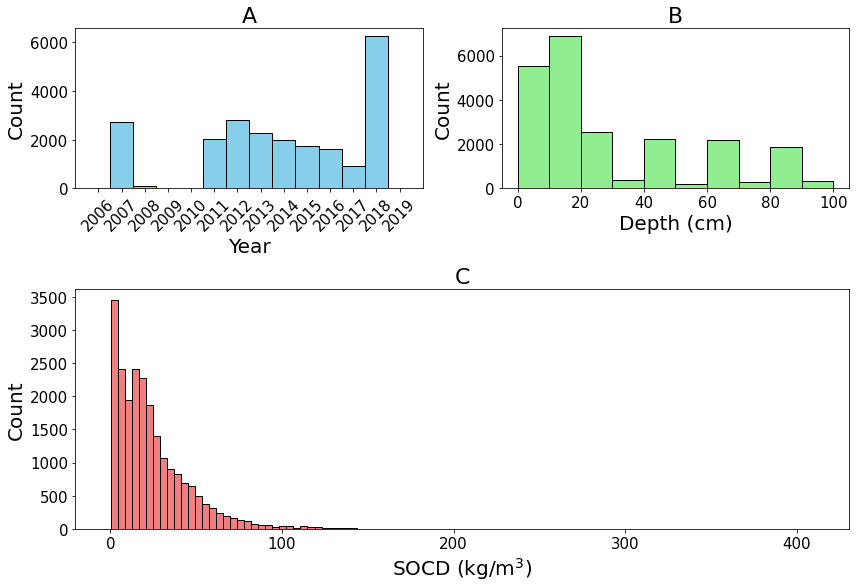

In [3]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])

# Time histogram
ax0 = plt.subplot(gs[0, 0])
ax0.hist(dff['time'], bins=np.arange(2006, 2020) - 0.5, color='skyblue', edgecolor='black')
ax0.set_xlabel('Year', fontsize=20)
ax0.set_ylabel('Count', fontsize=20)
ax0.set_title('A', fontsize=22)
ax0.set_xticks(np.arange(2006, 2020))  # Set the x-ticks to match the bins
ax0.set_xlim(2005, 2020)  # Adjust the x-axis limits
ax0.tick_params(axis='both', labelsize=15)
ax0.tick_params(axis='x', rotation=45)

# Depth histogram
ax1 = plt.subplot(gs[0, 1])
ax1.hist(dff['hzn_dep'], bins=10, range=[0,100], color='lightgreen', edgecolor='black')
ax1.set_xlabel('Depth (cm)', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax1.set_title('B', fontsize=22)
ax1.tick_params(axis='both', labelsize=15)

# SOCD histogram
ax2 = plt.subplot(gs[1, :])  # Spanning across two columns
ax2.hist(dff['ocd'], bins=100, color='lightcoral', edgecolor='black')
ax2.set_ylabel('Count', fontsize=20)
ax2.set_xlabel('SOCD (kg/m$^3$)', fontsize=20)
ax2.set_title('C', fontsize=22)
ax2.tick_params(axis='both', labelsize=15)

# # Set common title
# fig.suptitle('Data distribution', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/home/opengeohub/xuemeng/work_xuemeng/soc/result_paper/plot_data.availability.pdf', dpi=300)
plt.show()

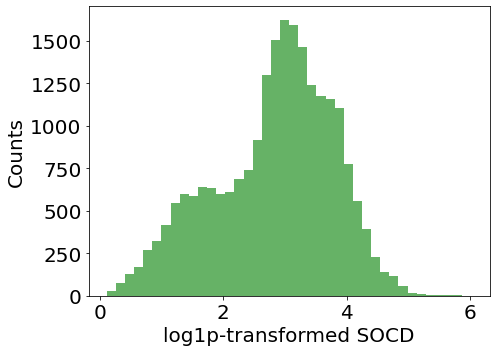

In [6]:
fig, axs = plt.subplots(figsize=(7, 5))

axs.hist(dff['ocd_log1p'], bins=40, density=False, alpha=0.6, color='g')
# axs.set_title('Log1p-scale', fontsize=16)
axs.set_ylabel('Counts', fontsize=20)
axs.set_xlabel('log1p-transformed SOCD', fontsize=20)
axs.tick_params(axis='both', labelsize=20)

# Adjust layout and save plot
plt.tight_layout()
plt.savefig('/home/opengeohub/xuemeng/work_xuemeng/soc/result_paper/plot_hist.log_log.vs.ori.pdf', dpi=300)
plt.show()

In [5]:
# count acorss ref and nuts0
hierarchical_counts = dff.groupby(['nuts0', 'ref']).size().unstack(fill_value=0)

hierarchical_counts 

ref,LUCAS,SoDaH,croatia.multione,germany.thuenen,ukceh
nuts0,,,,,
AT,140,0,0,0,0
BE,14,0,0,0,0
BG,224,0,0,0,0
CH,0,60,0,0,0
CY,26,0,0,0,0
CZ,168,0,0,0,0
DE,210,0,0,12720,0
DK,50,0,0,0,0
EE,77,0,0,0,0


In [19]:
# data=dff
# import matplotlib.colors as mcolors
# fig, ax = plt.subplots(figsize=(11, 8))
# hexbin = ax.hexbin(data['lon'], data['lat'], gridsize=150, cmap='RdYlGn', mincnt=1, norm=mcolors.LogNorm())
# ax.set_xlabel('Longitude', fontsize=14)
# ax.set_ylabel('Latitude', fontsize=14)
# ax.set_title(f'Spatial distribution of ocd data', fontsize=16)

# # if latbox is not None:
# #     ax.set_ylim(latbox)
# # if lonbox is not None:
# #     ax.set_xlim(lonbox)
# colorbar = plt.colorbar(hexbin)
# colorbar.set_label(f'count', fontsize=14)

# plt.grid(True)
# plt.show()

### get full covariate list

In [15]:
covs = []
meta = []
for ii in df.columns:
    if len(ii)>12 and 'qa' not in ii:
        covs.append(ii)
    else:
        meta.append(ii)
        
covs.append('hzn_dep')
print(len(covs))

559


In [16]:

with open(f'/home/opengeohub/xuemeng/work_xuemeng/soc/SOC-EU/features/001_covar_all.txt', 'w') as file:
    for item in covs:
        file.write(f"{item}\n")
        

In [17]:
from benchmark_pipeline import read_features
ccc = read_features('/home/opengeohub/xuemeng/work_xuemeng/soc/SOC-EU/features/000_covar_all.txt')
cc1 = read_features('/home/opengeohub/xuemeng/work_xuemeng/soc/SOC-EU/features/001_covar_all.txt')

In [1]:
# for iii in ccc:
#     if iii not in cc1:
#         print(iii)

### get only the sharable ones

In [9]:
share = pd.read_csv(f'{folder}/data_share/share_or_not.csv')
merged_df = pd.merge(df, share, on='ref', how='left')
share_df = merged_df.loc[merged_df['Can be shared within the consortium']=='Y']

In [10]:
share_df.to_csv(f'{folder}/data_share/AI4SH_WP5_soil.property.with.cov.csv',index=False)

In [11]:
prop = pd.read_csv('/mnt/inca/ai4sh_data.harmo/data/AI4SH_WP5_soil.property.csv')
len(prop)

/tmp/ipykernel_343673/3526804972.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  prop = pd.read_csv('/mnt/inca/ai4sh_data.harmo/data/AI4SH_WP5_soil.property.csv')


345645

In [4]:
len(dff)

,id,lat,lon,time,hzn_top,hzn_btm,ref,nuts0,oc,ph_h2o,...,lithology_EGDI_spilite,lithology_EGDI_syenite,lithology_EGDI_tephrite,lithology_EGDI_tonalite,lithology_EGDI_trachyte,lithology_EGDI_trachytoid,lithology_EGDI_tuffBrecciaAgglomerateOrPyroclasticBreccia,lithology_EGDI_ultramaficIgneousRock,lithology_EGDI_wacke,lithology_EGDI_Unpopulated
0,1-1,40.871480,-7.049093,2000.0,0.0,30.0,portugal.infosolo,PT,6.70,5.2,...,False,False,False,False,False,False,False,False,False,False
1,1-2,40.871480,-7.049093,2000.0,30.0,55.0,portugal.infosolo,PT,3.90,5.5,...,False,False,False,False,False,False,False,False,False,False
2,2-3,40.583860,-6.952317,2000.0,0.0,13.0,portugal.infosolo,PT,5.90,4.9,...,False,False,False,False,False,False,False,False,False,False
3,2-4,40.583860,-6.952317,2000.0,13.0,38.0,portugal.infosolo,PT,6.20,5.2,...,False,False,False,False,False,False,False,False,False,False
4,3-5,40.756090,-6.862586,2000.0,0.0,25.0,portugal.infosolo,PT,5.40,5.4,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394638,Diputación de Palencia - DP220201,41.935616,-4.513888,2022.0,0.0,25.0,Castilla.y.Leon,ES,6.55,NaN,...,False,False,False,False,False,False,False,False,False,False
394639,Diputación de Palencia - DP220202,41.935616,-4.513888,2022.0,0.0,25.0,Castilla.y.Leon,ES,7.35,NaN,...,False,False,False,False,False,False,False,False,False,False
394640,Diputación de Palencia - DP220030,41.775509,-3.959406,2022.0,0.0,25.0,Castilla.y.Leon,ES,4.30,NaN,...,False,False,False,False,False,False,False,False,False,False
394641,Diputación de Palencia - DP220090,42.323577,-4.312706,2022.0,0.0,25.0,Castilla.y.Leon,ES,3.60,NaN,...,False,False,False,False,False,False,False,False,False,False


In [1]:
# for i in dff.columns:
#     print(i)

In [ ]:
# ### generate training and validation data

# df = dff
# # get the id of full validation points
# bd_val = pd.read_csv(f'{folder}/data/003.0_validate.pnts.rob_bd.csv',low_memory=False)
# oc_val = pd.read_csv(f'{folder}/data/003.1_validate.pnts.rob_soc.csv',low_memory=False)

# idl = bd_val['id'].values.tolist() + oc_val['id'].values.tolist()
# idl = [str(i) for i in idl]

# test = df.loc[df['id'].isin(idl)]
# train = df.loc[~df['id'].isin(idl)]
# # val.to_csv(f'{folder}/data/004.0_validate.pnts_soc.csv',index=False)

# # # repeat for the properties appear less
# # idl = bd_val['id'].values.tolist()
# # idl = [str(i) for i in idl]

# # val = df.loc[df['id'].isin(idl)]
# # val.to_csv(f'{folder}/data/004.1_validate.pnts_prop.less.freq.csv',index=False)

# # # repeat to get training data, so without
# # idl = bd_val['id'].values.tolist() + oc_val['id'].values.tolist()
# # idl = [str(i) for i in idl]


# # # val.to_csv(f'{folder}/data/005.0_train.pnts_soc.csv',index=False)


# prop_cols = ['oc', 'ph_h2o', 'ph_cacl2', 'bulk_density', 'clay', 'silt', 'sand', 'caco3', 'N', 'K', 'P','CEC','EC']
# qa_filter = [5]

# # # covariates
# # meta_info = ['id','lat','lon','time','ref','nuts0','geometry','tile_id']
# # meta_prop = ['oc','ph_h2o','ph_cacl2','bulk_density','clay','silt','sand','caco3','N','K','P','CEC','EC']
# # meta_qa = [i+'_qa' for i in meta_prop]
# # meta = meta_info + meta_prop + meta_qa + [tgt]
# # covs = [i for i in dff.columns if i not in meta]

# iii = 0

# for prop in prop_cols:
#     istr = str(int(iii))
#     filt = qa_filter[iii]
    
#     train = train.loc[train[prop].notna()]
#     train = train.loc[train[f'{prop}_qa']>filt]
#     train.loc[:,f'{prop}_log1p'] = np.log1p(train[prop])
#     # get 10% of training data as calibration for parameter fine tuning and feature selection
#     cal = train.groupby('tile_id', group_keys=False).apply(lambda x: x.sample(n=max(1, int(np.ceil(0.1 * len(x))))))
#     cal.to_csv(f'{folder}/data/006.{istr}_cal.pnts_{prop}.csv',index=False)
#     # the rest as training dataset
#     new_train = train.drop(cal.index)
#     new_train.to_csv(f'{folder}/data/005.{istr}_train.pnts_{prop}.csv',index=False)

    
#     test = test.loc[test[prop].notna()]
#     test = test.loc[test[f'{prop}_qa']>filt]
#     test.loc[:,f'{prop}_log1p'] = np.log1p(test[prop])
#     test.to_csv(f'{folder}/data/004.{istr}_validate.pnts_{prop}.csv',index=False)
    
#     iii = iii+1
#     if iii>=len(qa_filter):
#         break
        
# print(len(high),len(low),len(new_train),len(train))

# high_cal = high.groupby('tile_id', group_keys=False).apply(lambda x: x.sample(n=max(1, int(np.ceil(0.1 * len(x))))))
# high_train = high.drop(high_cal.index)
# print(len(high),len(high_cal),len(high_train),len(high_cal)+len(+high_train))

# high_train.to_csv(f'{folder}/data/005.2_train.pnts_{prop}.org.csv',index=False)
# high_cal.to_csv(f'{folder}/data/006.1_cal.pnts_{prop}.org.csv',index=False)

# low_cal = low.groupby('tile_id', group_keys=False).apply(lambda x: x.sample(n=max(1, int(np.ceil(0.1 * len(x))))))
# low_train = low.drop(low_cal.index)
# print(len(low),len(low_cal),len(low_train),len(low_cal)+len(+low_train))

# low_train.to_csv(f'{folder}/data/005.3_train.pnts_{prop}.mnr.csv',index=False)
# low_cal.to_csv(f'{folder}/data/006.2_cal.pnts_{prop}.mnr.csv',index=False)

# # for SOC, prepare two calibration sets: organic and mineral
# prop = 'oc'

# train = train.loc[train[prop].notna()]
# train = train.loc[train[f'{prop}_qa']>5]
# train.loc[:,f'{prop}_log1p'] = np.log1p(train[prop])
    
# train_high = train.loc[train[f'{prop}_log1p'] > 5]
# train_low = train.loc[train[f'{prop}_log1p'] <= 5.5]

# high = train_high.groupby('tile_id', group_keys=False).apply(lambda x: x.sample(n=max(1, int(np.ceil(0.5 * len(x))))))
# print(len(high))
# low = train_low.groupby('tile_id', group_keys=False).apply(lambda x: x.sample(n=max(1, int(np.ceil(0.5 * len(x))))))
# print(len(low))
# cal = pd.concat([high, low])
# new_train = train.drop(cal.index)
# new_train.to_csv(f'{folder}/data/005.1_train.pnts_{prop}.org.mnr.csv',index=False)

In [2]:
# ## EGDI conversion

# for i in df.columns:
#     if 'egdi' in i:
#         print(i)
        
        
# lithology = '''1	alkaliOlivineBasalt
# 2	amphibolite
# 3	andesite
# 4	anorthositicRock
# 5	arenite
# 6	ashBrecciaBombOrBlockTephra
# 7	ashTuffLapillistoneAndLapilliTuff
# 8	basalt
# 9	basanite
# 10	biogenicSilicaSedimentaryRock
# 11	breccia
# 12	brecciaGougeSeries
# 13	carbonateMud
# 14	carbonateOoze
# 15	carbonateSedimentaryRock
# 16	carbonatite
# 17	chalk
# 18	chloriteActinoliteEpidoteMetamorphicRock
# 19	clasticSandstone
# 20	clasticSediment
# 21	clasticSedimentaryMaterial
# 22	clasticSedimentaryRock
# 23	clay
# 24	claystone
# 25	conglomerate
# 26	dacite
# 27	diamictite
# 28	diamicton
# 29	diorite
# 30	dioriticRock
# 31	doleriticRock
# 32	dolomite
# 33	dolomiticOrMagnesianSedimentaryRock
# 34	eclogite
# 35	exoticCompositionIgneousRock
# 36	fineGrainedIgneousRock
# 37	foidBearingSyenite
# 38	foidSyenitoid
# 39	foliatedMetamorphicRock
# 40	fragmentalIgneousMaterial
# 41	gabbro
# 42	gabbroicRock
# 43	gabbroid
# 44	glaucophaneLawsoniteEpidoteMetamorphicRock
# 45	gneiss
# 46	granite
# 47	granitoid
# 48	granodiorite
# 49	granulite
# 50	gravel
# 51	gypsumOrAnhydrite
# 52	hornfels
# 53	igneousMaterial
# 54	igneousRock
# 55	impactGeneratedMaterial
# 56	impureCarbonateSediment
# 57	impureCarbonateSedimentaryRock
# 58	impureDolomite
# 59	impureLimestone
# 60	komatiiticRock
# 61	limestone
# 62	marble
# 63	metamorphicRock
# 64	metasomaticRock
# 65	micaSchist
# 66	migmatite
# 67	monzogranite
# 68	monzonite
# 69	mud
# 70	mudstone
# 71	myloniticRock
# 72	nonClasticSiliceousSedimentaryRock
# 73	organicBearingMudstone
# 74	organicRichSediment
# 75	organicRichSedimentaryMaterial
# 76	orthogneiss
# 77	paragneiss
# 78	peat
# 79	peridotite
# 80	phaneriticIgneousRock
# 81	phonolite
# 82	phyllite
# 83	phyllonite
# 84	porphyry
# 85	pyroclasticMaterial
# 86	pyroclasticRock
# 87	pyroxenite
# 88	quartzDiorite
# 89	quartzite
# 90	residualMaterial
# 91	rhyolite
# 92	rhyolitoid
# 93	rock
# 94	sand
# 95	sandstone
# 96	schist
# 97	sediment
# 98	sedimentaryMaterial
# 99	sedimentaryRock
# 100	serpentinite
# 101	shale
# 102	silicateMud
# 103	silt
# 104	siltstone
# 105	skarn
# 106	slate
# 107	spilite
# 108	syenite
# 109	syeniticRock
# 110	syenogranite
# 111	tephrite
# 112	tholeiiticBasalt
# 113	tonalite
# 114	trachyte
# 115	trachyticRock
# 116	trachytoid
# 117	travertine
# 118	tuffBrecciaAgglomerateOrPyroclasticBreccia
# 119	ultramaficIgneousRock
# 120	wacke
# 121	waste
# 122	Unknown
# 123	Unpopulated'''

# lithology = lithology.split('\n')
# value = [float(i.split('\t')[0]) for i in lithology]
# descp = [i.split('\t')[1] for i in lithology]
# descp = ['lithology_EGDI_'+i for i in descp]
# lithology_map = dict(zip(value,descp))

# # some soil parental material = 0, might from the landmask, mixing water and land
# spm = 'dtm_surface.lithology_egdi.1m_c_250m_s_20000101_20221231_eu_epsg.3035_v20240530'
# df.loc[df[spm]==0,spm] = np.nan
# dummies = pd.get_dummies(df[spm])
# dummies = dummies.rename(columns=lithology_map)
# dff = pd.concat([df, dummies], axis=1)
# dff = dff.drop(columns=[spm])


dtm_surface.lithology_egdi.1m_c_250m_s_20000101_20221231_eu_epsg.3035_v20240530
